In [1]:
import pickle 
import os
from pathlib import Path
import numpy as np
import sys
sys.path.append('../')

# Load the data from the pickle files

In [2]:
raghav_ec_path = Path('../test_data/raghav_eyes_closed/') # Path to raghav's Eyes closed data
raghav_w_path = Path('../test_data/raghav_work/') # Path to raghavs Work Data

In [3]:
# This function will load the data from all the pickle files in the given path
def load_all_pickle_files(path,vstack=False):
    # If vstack is true, then it will combine data of all files into a single numpy array
    # by stacking them one upon other
    path = Path(path)
    data = []
    for file in os.listdir(path):
        if 'pickle' in file:
            print(f"Loading File: {file}")
            with open(path/file,'rb') as f_:
                d = pickle.load(f_)
                data.append(d)
       
    if(vstack == True):
        data = np.vstack(data)
    else:
        data = np.array(data)
    return data

In [4]:
raghav_ec_data = load_all_pickle_files(raghav_ec_path) # Data for eyes closed
raghav_w_data = load_all_pickle_files(raghav_w_path) # Data for work

Loading File: [f]raghav_eyes_closed_2|111019_122051.pickle
Loading File: [f]eyes_closed|141019_160513.pickle
Loading File: [f]raghav_eyes_closed_1|111019_121756.pickle
Loading File: [f]raghavendra_eyes_closed|151019_162800.pickle
Loading File: [f]raghav_eyes_closed_3|111019_122407.pickle
Loading File: [f]ragavendra_attention|171019_133116.pickle
Loading File: [f]assignment|141019_190516.pickle
Loading File: [f]reading_research_paper_1|111019_150922.pickle
Loading File: [f]reading_research_paper_1|111019_145415.pickle


# Plot the data

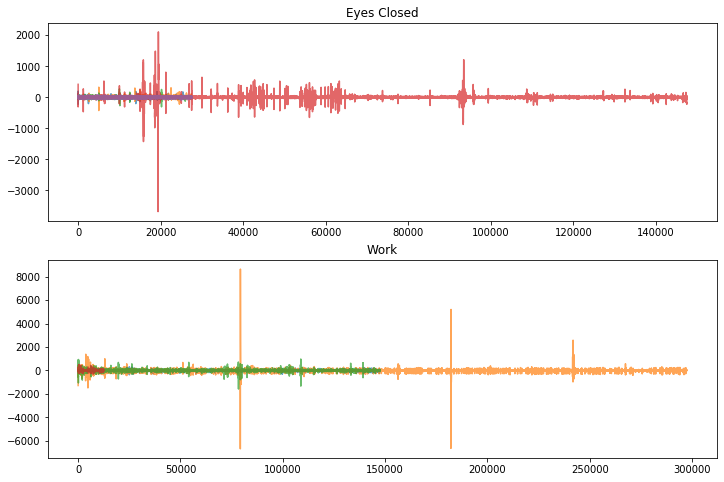

In [5]:
# Plot the filtered (DC and 50Hz notch) data without removing bad epochs
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(2,1, figsize=(12,8))

for dt in raghav_ec_data:
    ax[0].plot(dt[10:,0,:].reshape(-1), alpha=0.7)
    ax[0].set_title('Eyes Closed')

for dt in raghav_w_data:
    ax[1].plot(dt[10:,0,:].reshape(-1), alpha=0.7)
    ax[1].set_title('Work')

# Remove Bad Epochs

In [6]:
from features import feature_removal as fr
import config
raghav_ec_clean = []  # Clean Eyes closed data
raghav_w_clean = []  # Clean work data

for d in raghav_ec_data:
    config.reset_filter_states()
    raghav_ec_clean.append(fr.remove_bad_epochs(d,fr.energy_of_epoch,threshold=400))
    
for d in raghav_w_data:
    config.reset_filter_states()
    raghav_w_clean.append(fr.remove_bad_epochs(d,fr.energy_of_epoch,threshold=400))



Starting creating streamer....
Using config.dataReader - random number
CONSOLE: ENEGERGY: 2109006.1879704227
CONSOLE: ENEGERGY: 338133.2121041954
CONSOLE: ENEGERGY: 50301.462974235365
CONSOLE: ENEGERGY: 3374.307708438417
CONSOLE: ENEGERGY: 160.6919686475319
CONSOLE: ENEGERGY: 295.1607570872093
CONSOLE: ENEGERGY: 58.434129953832105
CONSOLE: ENEGERGY: 37.96875360173501
CONSOLE: ENEGERGY: 55.30768406650847
CONSOLE: ENEGERGY: 50.683545234126385
CONSOLE: ENEGERGY: 93.33736523392646
CONSOLE: ENEGERGY: 58.80169400013732
CONSOLE: ENEGERGY: 53.226655151318425
CONSOLE: ENEGERGY: 22.116258757915496
CONSOLE: ENEGERGY: 58.51553123979649
CONSOLE: ENEGERGY: 68.96177881017391
CONSOLE: ENEGERGY: 113.02679458537611
CONSOLE: ENEGERGY: 47.11534716459745
CONSOLE: ENEGERGY: 37.95860231788809
CONSOLE: ENEGERGY: 45.551666995556005
CONSOLE: ENEGERGY: 32.28642567745564
CONSOLE: ENEGERGY: 48.11701544380208
CONSOLE: ENEGERGY: 38.523836895676574
CONSOLE: ENEGERGY: 16.948635832764857
CONSOLE: ENEGERGY: 5.1662738247

CONSOLE: ENEGERGY: 8082491.410735076
CONSOLE: ENEGERGY: 1153525.6103026504
CONSOLE: ENEGERGY: 88185.43468963858
CONSOLE: ENEGERGY: 8053.278312572166
CONSOLE: ENEGERGY: 414.36167468276386
CONSOLE: ENEGERGY: 209.43099614105333
CONSOLE: ENEGERGY: 269.8868924731212
CONSOLE: ENEGERGY: 33.79147863596153
CONSOLE: ENEGERGY: 1399.1541389443646
CONSOLE: ENEGERGY: 4658.359292125154
CONSOLE: ENEGERGY: 18427.12073278502
CONSOLE: ENEGERGY: 9289.876820120144
CONSOLE: ENEGERGY: 100725.92655311596
CONSOLE: ENEGERGY: 45424.077682730735
CONSOLE: ENEGERGY: 13772.158424140054
CONSOLE: ENEGERGY: 915.7545040900033
CONSOLE: ENEGERGY: 126.97862023468112
CONSOLE: ENEGERGY: 140.1504044589929
CONSOLE: ENEGERGY: 52.60799962103191
CONSOLE: ENEGERGY: 47.10244706803573
CONSOLE: ENEGERGY: 27.64522809885479
CONSOLE: ENEGERGY: 53.059590689924036
CONSOLE: ENEGERGY: 16.370007575040137
CONSOLE: ENEGERGY: 54.94565433734494
CONSOLE: ENEGERGY: 45.509840124593254
CONSOLE: ENEGERGY: 46.39406170359635
CONSOLE: ENEGERGY: 55.81734

CONSOLE: ENEGERGY: 3236909.8177441377
CONSOLE: ENEGERGY: 567890.3110326668
CONSOLE: ENEGERGY: 38421.79279411168
CONSOLE: ENEGERGY: 2210.614948437511
CONSOLE: ENEGERGY: 326.63796899926916
CONSOLE: ENEGERGY: 103.71427612230487
CONSOLE: ENEGERGY: 450.9731283566797
CONSOLE: ENEGERGY: 1012.9617990680413
CONSOLE: ENEGERGY: 800.9910551042224
CONSOLE: ENEGERGY: 596.3368461447209
CONSOLE: ENEGERGY: 493.7323713228564
CONSOLE: ENEGERGY: 198.3476805904218
CONSOLE: ENEGERGY: 112.6973657401887
CONSOLE: ENEGERGY: 60.35251197219049
CONSOLE: ENEGERGY: 51.623967377599975
CONSOLE: ENEGERGY: 37.47144244668058
CONSOLE: ENEGERGY: 96.90181978036459
CONSOLE: ENEGERGY: 71.96024450927885
CONSOLE: ENEGERGY: 50.56270745173785
CONSOLE: ENEGERGY: 47.18004417478345
CONSOLE: ENEGERGY: 25.75433357437895
CONSOLE: ENEGERGY: 84.09171018023079
CONSOLE: ENEGERGY: 154.13774250705453
CONSOLE: ENEGERGY: 51.44486973467827
CONSOLE: ENEGERGY: 16.11580241561119
CONSOLE: ENEGERGY: 15.088209954145084
CONSOLE: ENEGERGY: 36.344476948

CONSOLE: ENEGERGY: 567130.7418605998
CONSOLE: ENEGERGY: 178562.2716238782
CONSOLE: ENEGERGY: 17809.58800911033
CONSOLE: ENEGERGY: 2505.967339287189
CONSOLE: ENEGERGY: 359.27763264095876
CONSOLE: ENEGERGY: 79.13961524748025
CONSOLE: ENEGERGY: 94.01894279915423
CONSOLE: ENEGERGY: 95.26160557581025
CONSOLE: ENEGERGY: 197.12022310224688
CONSOLE: ENEGERGY: 719.859629365505
CONSOLE: ENEGERGY: 363.2807918976272
CONSOLE: ENEGERGY: 89.99931018831023
CONSOLE: ENEGERGY: 27.186489130951486
CONSOLE: ENEGERGY: 85.9134924449071
CONSOLE: ENEGERGY: 47.496437382772015
CONSOLE: ENEGERGY: 25.85162881741145
CONSOLE: ENEGERGY: 30.340737060457446
CONSOLE: ENEGERGY: 53.628721773223994
CONSOLE: ENEGERGY: 92.39518402850823
CONSOLE: ENEGERGY: 51.25582419324685
CONSOLE: ENEGERGY: 16.579087359057695
CONSOLE: ENEGERGY: 27.134845458611267
CONSOLE: ENEGERGY: 75.34921076713097
CONSOLE: ENEGERGY: 44.893235669246835
CONSOLE: ENEGERGY: 30.076675311772508
CONSOLE: ENEGERGY: 20.783695476597067
CONSOLE: ENEGERGY: 13.7918233

CONSOLE: ENEGERGY: 204.9578777030237
CONSOLE: ENEGERGY: 70.45534343216083
CONSOLE: ENEGERGY: 80.97015080613488
CONSOLE: ENEGERGY: 504.3653830404114
CONSOLE: ENEGERGY: 147.0349711949229
CONSOLE: ENEGERGY: 105.89032502430918
CONSOLE: ENEGERGY: 45.307145122104075
CONSOLE: ENEGERGY: 18.47229883982152
CONSOLE: ENEGERGY: 906.6791886874589
CONSOLE: ENEGERGY: 781.7601357448133
CONSOLE: ENEGERGY: 323.4956579203093
CONSOLE: ENEGERGY: 77.50433242195038
CONSOLE: ENEGERGY: 62.981416388065924
CONSOLE: ENEGERGY: 32.45643781863606
CONSOLE: ENEGERGY: 39.757898698286795
CONSOLE: ENEGERGY: 25.934423076069358
CONSOLE: ENEGERGY: 13.791247636753745
CONSOLE: ENEGERGY: 20.441069902634315
CONSOLE: ENEGERGY: 29.133770155279155
CONSOLE: ENEGERGY: 24.26036107639603
CONSOLE: ENEGERGY: 17.89355891787273
CONSOLE: ENEGERGY: 8.35393842729554
CONSOLE: ENEGERGY: 12.792106111518041
CONSOLE: ENEGERGY: 38.506992057981606
CONSOLE: ENEGERGY: 26.11212098442662
CONSOLE: ENEGERGY: 25.673459431138543
CONSOLE: ENEGERGY: 12.681348

CONSOLE: ENEGERGY: 25.83092845666444
CONSOLE: ENEGERGY: 16.538524135747117
CONSOLE: ENEGERGY: 27.842912175749195
CONSOLE: ENEGERGY: 26.457332619735986
CONSOLE: ENEGERGY: 23.083886602543433
CONSOLE: ENEGERGY: 43.21436043589111
CONSOLE: ENEGERGY: 35.240457106132865
CONSOLE: ENEGERGY: 42.31559552761155
CONSOLE: ENEGERGY: 39.18748101316631
CONSOLE: ENEGERGY: 12.702057032872245
CONSOLE: ENEGERGY: 17.937250543788117
CONSOLE: ENEGERGY: 19.117683193555532
CONSOLE: ENEGERGY: 18.707810982837778
CONSOLE: ENEGERGY: 17.24262402806957
CONSOLE: ENEGERGY: 26.744146687584173
CONSOLE: ENEGERGY: 41.41104884750864
CONSOLE: ENEGERGY: 17.24144251159418
CONSOLE: ENEGERGY: 29.577042103675495
CONSOLE: ENEGERGY: 21.628352808896306
CONSOLE: ENEGERGY: 23.467748450756815
CONSOLE: ENEGERGY: 119.59379078185276
CONSOLE: ENEGERGY: 196.0258968922231
CONSOLE: ENEGERGY: 437.479530047824
CONSOLE: ENEGERGY: 20.423753739272158
CONSOLE: ENEGERGY: 57.94791030010126
CONSOLE: ENEGERGY: 93.03405364594327
CONSOLE: ENEGERGY: 16.67

CONSOLE: ENEGERGY: 3270474.119308485
CONSOLE: ENEGERGY: 578360.005901696
CONSOLE: ENEGERGY: 59026.98988990984
CONSOLE: ENEGERGY: 3820.774461212352
CONSOLE: ENEGERGY: 597.943454584298
CONSOLE: ENEGERGY: 438.4825158375073
CONSOLE: ENEGERGY: 186.92799107852406
CONSOLE: ENEGERGY: 289.1883077181403
CONSOLE: ENEGERGY: 133.9115059711102
CONSOLE: ENEGERGY: 162.663407595784
CONSOLE: ENEGERGY: 28.61057378214492
CONSOLE: ENEGERGY: 39.45528280125643
CONSOLE: ENEGERGY: 170.61962102236237
CONSOLE: ENEGERGY: 391.65110901374976
CONSOLE: ENEGERGY: 110.11911599167574
CONSOLE: ENEGERGY: 131.59932682991536
CONSOLE: ENEGERGY: 104.49195940255584
CONSOLE: ENEGERGY: 97.5372343038652
CONSOLE: ENEGERGY: 164.9989426225427
CONSOLE: ENEGERGY: 89.75399520472345
CONSOLE: ENEGERGY: 22.563430071869696
CONSOLE: ENEGERGY: 46.55752565147281
CONSOLE: ENEGERGY: 28.26186108958573
CONSOLE: ENEGERGY: 80.02224740299626
CONSOLE: ENEGERGY: 38.84851365870377
CONSOLE: ENEGERGY: 42.273485623421394
CONSOLE: ENEGERGY: 14.528989198618

CONSOLE: ENEGERGY: 83.57743236233134
CONSOLE: ENEGERGY: 17.372782045769068
CONSOLE: ENEGERGY: 16.07121772205121
CONSOLE: ENEGERGY: 25.653560489611756
CONSOLE: ENEGERGY: 19.503102757912274
CONSOLE: ENEGERGY: 8.675276673311922
CONSOLE: ENEGERGY: 10.881290090550799
CONSOLE: ENEGERGY: 23.45368269564037
CONSOLE: ENEGERGY: 34.49106056548342
CONSOLE: ENEGERGY: 16.330741099791073
CONSOLE: ENEGERGY: 30.125552026477315
CONSOLE: ENEGERGY: 24.39738089023541
CONSOLE: ENEGERGY: 322.63459026806663
CONSOLE: ENEGERGY: 1832.8465168035814
CONSOLE: ENEGERGY: 124.19454877791458
CONSOLE: ENEGERGY: 74.55878240830634
CONSOLE: ENEGERGY: 46.83474106226261
CONSOLE: ENEGERGY: 22.59093329260206
CONSOLE: ENEGERGY: 34.0326019342858
CONSOLE: ENEGERGY: 72.75541416606991
CONSOLE: ENEGERGY: 37.68569352637613
CONSOLE: ENEGERGY: 59.182961600767975
CONSOLE: ENEGERGY: 41.57363855055923
CONSOLE: ENEGERGY: 13.251504350834612
CONSOLE: ENEGERGY: 24.3050042661331
CONSOLE: ENEGERGY: 26.53179113494499
CONSOLE: ENEGERGY: 12.3802377

CONSOLE: ENEGERGY: 425.60392661522945
CONSOLE: ENEGERGY: 74.86257604920641
CONSOLE: ENEGERGY: 355.2366184647647
CONSOLE: ENEGERGY: 99.9730991426514
CONSOLE: ENEGERGY: 230.58650262868218
CONSOLE: ENEGERGY: 587.7673902170924
CONSOLE: ENEGERGY: 275.38576028898143
CONSOLE: ENEGERGY: 631.9240925295085
CONSOLE: ENEGERGY: 5280.162532019408
CONSOLE: ENEGERGY: 8779.234108684152
CONSOLE: ENEGERGY: 922.9149930746001
CONSOLE: ENEGERGY: 398.82038782686845
CONSOLE: ENEGERGY: 558.3793681472017
CONSOLE: ENEGERGY: 71.34279138052815
CONSOLE: ENEGERGY: 35.80435430749145
CONSOLE: ENEGERGY: 379.1015745573225
CONSOLE: ENEGERGY: 400.83955337263865
CONSOLE: ENEGERGY: 202.4871980587954
CONSOLE: ENEGERGY: 171.30569484897066
CONSOLE: ENEGERGY: 410.49872454783275
CONSOLE: ENEGERGY: 133.22720752392206
CONSOLE: ENEGERGY: 36.154327918803936
CONSOLE: ENEGERGY: 48.512193549682664
CONSOLE: ENEGERGY: 86.02489319809551
CONSOLE: ENEGERGY: 667.1683517142702
CONSOLE: ENEGERGY: 289.8797532510524
CONSOLE: ENEGERGY: 4058.46239

CONSOLE: ENEGERGY: 54.17697265683608
CONSOLE: ENEGERGY: 38.935829566801274
CONSOLE: ENEGERGY: 33.680915829894616
CONSOLE: ENEGERGY: 41.330016493237416
CONSOLE: ENEGERGY: 38.66486642896055
CONSOLE: ENEGERGY: 77.13830839462683
CONSOLE: ENEGERGY: 35.836139634399196
CONSOLE: ENEGERGY: 20.91658823325039
CONSOLE: ENEGERGY: 36.71046304772107
CONSOLE: ENEGERGY: 52.070745103391715
CONSOLE: ENEGERGY: 28.68699348444807
CONSOLE: ENEGERGY: 38.519807807052445
CONSOLE: ENEGERGY: 33.203152979051715
CONSOLE: ENEGERGY: 47.48983131191666
CONSOLE: ENEGERGY: 27.666131108734962
CONSOLE: ENEGERGY: 25.193939006754466
CONSOLE: ENEGERGY: 173.1243232106805
CONSOLE: ENEGERGY: 901.3631714696645
CONSOLE: ENEGERGY: 2659.4003795488666
CONSOLE: ENEGERGY: 406.00127848305453
CONSOLE: ENEGERGY: 207.53058432333063
CONSOLE: ENEGERGY: 70.59209672599371
CONSOLE: ENEGERGY: 91.57630820154316
CONSOLE: ENEGERGY: 2767.269319446713
CONSOLE: ENEGERGY: 3999.540613285191
CONSOLE: ENEGERGY: 410.9588480713459
CONSOLE: ENEGERGY: 382.793

CONSOLE: ENEGERGY: 20.899512938427943
CONSOLE: ENEGERGY: 27.83693757954752
CONSOLE: ENEGERGY: 11.740176661006563
CONSOLE: ENEGERGY: 17.932808027390962
CONSOLE: ENEGERGY: 31.80875319033817
CONSOLE: ENEGERGY: 52.10303869860056
CONSOLE: ENEGERGY: 161.5362007128097
CONSOLE: ENEGERGY: 129.07644102746113
CONSOLE: ENEGERGY: 112.62698162657334
CONSOLE: ENEGERGY: 127.71808750137507
CONSOLE: ENEGERGY: 17.127905778581173
CONSOLE: ENEGERGY: 54.12925140111894
CONSOLE: ENEGERGY: 52.07259000072611
CONSOLE: ENEGERGY: 33.74529157834499
CONSOLE: ENEGERGY: 37.05123669732556
CONSOLE: ENEGERGY: 48.51984185762254
CONSOLE: ENEGERGY: 19.72815607906519
CONSOLE: ENEGERGY: 3216.8177957255193
CONSOLE: ENEGERGY: 926.5428031144436
CONSOLE: ENEGERGY: 271.5894435973549
CONSOLE: ENEGERGY: 61.871076645869735
CONSOLE: ENEGERGY: 59.89021735344383
CONSOLE: ENEGERGY: 33.04589695920953
CONSOLE: ENEGERGY: 24.026683694826833
CONSOLE: ENEGERGY: 31.413192545594153
CONSOLE: ENEGERGY: 286.97088909017236
CONSOLE: ENEGERGY: 771.477

CONSOLE: ENEGERGY: 30.841803315300822
CONSOLE: ENEGERGY: 22.343791868885504
CONSOLE: ENEGERGY: 14.590088081467686
CONSOLE: ENEGERGY: 5319.354876302531
CONSOLE: ENEGERGY: 1196.6176019748316
CONSOLE: ENEGERGY: 1412.6636291693449
CONSOLE: ENEGERGY: 5037.612633773502
CONSOLE: ENEGERGY: 850.0437313315138
CONSOLE: ENEGERGY: 109.43290252751989
CONSOLE: ENEGERGY: 50.48737023564328
CONSOLE: ENEGERGY: 11.386212585961225
CONSOLE: ENEGERGY: 19.533132620643705
CONSOLE: ENEGERGY: 42.70562816277382
CONSOLE: ENEGERGY: 27.476589865504778
CONSOLE: ENEGERGY: 23.755081447084116
CONSOLE: ENEGERGY: 22.528910392500023
CONSOLE: ENEGERGY: 23.370745683469416
CONSOLE: ENEGERGY: 26.48839262451287
CONSOLE: ENEGERGY: 33.14945133806648
CONSOLE: ENEGERGY: 18.13306978920479
CONSOLE: ENEGERGY: 30.401372170471188
CONSOLE: ENEGERGY: 21.28087837084943
CONSOLE: ENEGERGY: 1621.6664088695895
CONSOLE: ENEGERGY: 2306.4999794725986
CONSOLE: ENEGERGY: 1454.4528173839817
CONSOLE: ENEGERGY: 4052.1790432547605
CONSOLE: ENEGERGY: 41

CONSOLE: ENEGERGY: 343.8834292490076
CONSOLE: ENEGERGY: 105.54988529083394
CONSOLE: ENEGERGY: 337.0331082518517
CONSOLE: ENEGERGY: 342.3476009671147
CONSOLE: ENEGERGY: 7163.62604409395
CONSOLE: ENEGERGY: 1160.8101970489292
CONSOLE: ENEGERGY: 449.3506829293623
CONSOLE: ENEGERGY: 4037.766252986326
CONSOLE: ENEGERGY: 2188.8526247474997
CONSOLE: ENEGERGY: 376.634240688497
CONSOLE: ENEGERGY: 298.9507524540437
CONSOLE: ENEGERGY: 6606.8844434571065
CONSOLE: ENEGERGY: 1642.0346235242255
CONSOLE: ENEGERGY: 5005.2015640693835
CONSOLE: ENEGERGY: 942.3681266081259
CONSOLE: ENEGERGY: 214.9164965632827
CONSOLE: ENEGERGY: 36.03167168614398
CONSOLE: ENEGERGY: 17.15657889767671
CONSOLE: ENEGERGY: 210.63984545021248
CONSOLE: ENEGERGY: 4240.077248236404
CONSOLE: ENEGERGY: 429.6043948722811
CONSOLE: ENEGERGY: 127.44434703873554
CONSOLE: ENEGERGY: 2239.0062212243274
CONSOLE: ENEGERGY: 2670.626441199662
CONSOLE: ENEGERGY: 313.0805838109867
CONSOLE: ENEGERGY: 77.66256740249949
CONSOLE: ENEGERGY: 75.892932357

CONSOLE: ENEGERGY: 5830555.602971837
CONSOLE: ENEGERGY: 4290359.716702244
CONSOLE: ENEGERGY: 1726775.3452067038
CONSOLE: ENEGERGY: 119240.1797167822
CONSOLE: ENEGERGY: 51986.2543239524
CONSOLE: ENEGERGY: 159004.4523859039
CONSOLE: ENEGERGY: 178969.5359255055
CONSOLE: ENEGERGY: 38878.010070414886
CONSOLE: ENEGERGY: 6776.475932718373
CONSOLE: ENEGERGY: 2852.863018398504
CONSOLE: ENEGERGY: 328.5345216713798
CONSOLE: ENEGERGY: 2712.3839496942696
CONSOLE: ENEGERGY: 11731.429088601151
CONSOLE: ENEGERGY: 36553.10672894493
CONSOLE: ENEGERGY: 2217.9238893406455
CONSOLE: ENEGERGY: 2471.6767869837977
CONSOLE: ENEGERGY: 1795.6222609860718
CONSOLE: ENEGERGY: 156.8973201436546
CONSOLE: ENEGERGY: 676.4400424869431
CONSOLE: ENEGERGY: 9628.26141169357
CONSOLE: ENEGERGY: 81510.12612920698
CONSOLE: ENEGERGY: 50734.02781768228
CONSOLE: ENEGERGY: 9598.712246243389
CONSOLE: ENEGERGY: 6838.624753821645
CONSOLE: ENEGERGY: 1049.5212275195079
CONSOLE: ENEGERGY: 3636.5214917826515
CONSOLE: ENEGERGY: 8169.9660567

CONSOLE: ENEGERGY: 484.35106594428953
CONSOLE: ENEGERGY: 300.71289107657753
CONSOLE: ENEGERGY: 499.80301028019863
CONSOLE: ENEGERGY: 602.928096116779
CONSOLE: ENEGERGY: 955.8969569340162
CONSOLE: ENEGERGY: 138.42853557298213
CONSOLE: ENEGERGY: 152.42878968511116
CONSOLE: ENEGERGY: 106.8050438165641
CONSOLE: ENEGERGY: 116.5903789189925
CONSOLE: ENEGERGY: 124.20180903881901
CONSOLE: ENEGERGY: 59.6432787410952
CONSOLE: ENEGERGY: 80.08460702570308
CONSOLE: ENEGERGY: 75.08386515784372
CONSOLE: ENEGERGY: 31.91115416294461
CONSOLE: ENEGERGY: 75.94163077127851
CONSOLE: ENEGERGY: 46.72093251950195
CONSOLE: ENEGERGY: 92.75916935216054
CONSOLE: ENEGERGY: 253.34597276037755
CONSOLE: ENEGERGY: 378.7338448539731
CONSOLE: ENEGERGY: 182.15706556623223
CONSOLE: ENEGERGY: 2702.456678640783
CONSOLE: ENEGERGY: 940.9362303039256
CONSOLE: ENEGERGY: 257.4836860721655
CONSOLE: ENEGERGY: 125.33219255103204
CONSOLE: ENEGERGY: 229.8407060049255
CONSOLE: ENEGERGY: 113.05403383889279
CONSOLE: ENEGERGY: 401.1860126

CONSOLE: ENEGERGY: 91.4989174614833
CONSOLE: ENEGERGY: 97.37396298052485
CONSOLE: ENEGERGY: 58.771052205443674
CONSOLE: ENEGERGY: 69.79962547321342
CONSOLE: ENEGERGY: 38.091625327472315
CONSOLE: ENEGERGY: 84.81784383230936
CONSOLE: ENEGERGY: 60.307494090496256
CONSOLE: ENEGERGY: 29.61732709913079
CONSOLE: ENEGERGY: 42.03726054093048
CONSOLE: ENEGERGY: 45.92552250382737
CONSOLE: ENEGERGY: 62.9100509212804
CONSOLE: ENEGERGY: 41.74695076894427
CONSOLE: ENEGERGY: 33.98582491708801
CONSOLE: ENEGERGY: 19.045242943923974
CONSOLE: ENEGERGY: 98.80720626620823
CONSOLE: ENEGERGY: 36.19364212364548
CONSOLE: ENEGERGY: 18.374091304828653
CONSOLE: ENEGERGY: 54.52120595976661
CONSOLE: ENEGERGY: 50.37097444847602
CONSOLE: ENEGERGY: 23.408463089881174
CONSOLE: ENEGERGY: 258.04873615302716
CONSOLE: ENEGERGY: 240.58000183193693
CONSOLE: ENEGERGY: 136.8462684602895
CONSOLE: ENEGERGY: 48.10374834008753
CONSOLE: ENEGERGY: 71.12720551327469
CONSOLE: ENEGERGY: 19.483560121358863
CONSOLE: ENEGERGY: 17.775882744

CONSOLE: ENEGERGY: 1107132.0110416936
CONSOLE: ENEGERGY: 335489.43800802215
CONSOLE: ENEGERGY: 24885.971948711078
CONSOLE: ENEGERGY: 1897.7635006639039
CONSOLE: ENEGERGY: 3135.2969538785587
CONSOLE: ENEGERGY: 2489.538348131488
CONSOLE: ENEGERGY: 1001.0541264062484
CONSOLE: ENEGERGY: 254.80937334211282
CONSOLE: ENEGERGY: 64.6911491635178
CONSOLE: ENEGERGY: 195.56524173207492
CONSOLE: ENEGERGY: 73.22760750822964
CONSOLE: ENEGERGY: 64.16970618119885
CONSOLE: ENEGERGY: 265.781138446795
CONSOLE: ENEGERGY: 1231.656252285299
CONSOLE: ENEGERGY: 280.1334633265186
CONSOLE: ENEGERGY: 305.9760307969691
CONSOLE: ENEGERGY: 8431.260168772162
CONSOLE: ENEGERGY: 12125.790781473373
CONSOLE: ENEGERGY: 6684.3688534481635
CONSOLE: ENEGERGY: 3594.190033438364
CONSOLE: ENEGERGY: 1214.4561785269516
CONSOLE: ENEGERGY: 3075.8991960369217
CONSOLE: ENEGERGY: 12847.079667948068
CONSOLE: ENEGERGY: 3296.49325819143
CONSOLE: ENEGERGY: 4331.271767824158
CONSOLE: ENEGERGY: 844.2114699453069
CONSOLE: ENEGERGY: 499.78941

In [7]:
print("New shapes of clean EC data")
for d in raghav_ec_clean:
    print(d.shape)

print("New shapes of clean Work data")
for d in raghav_w_clean:
    print(d.shape)

New shapes of clean EC data
(232, 1, 250)
(216, 1, 250)
(227, 1, 250)
(1116, 1, 250)
(232, 1, 250)
New shapes of clean Work data
(1015, 1, 250)
(1386, 1, 250)
(780, 1, 250)
(66, 1, 250)


# Get the bandpower percentage of the data
See how much each band contributes to the overall bandpower.
The get_bandpower function has a parameter called relative. If you set it as True, then the 
function will calculate the bandpower percentage instead of overall bandpower

In [23]:
from features import get_bandpower
config.reset_filter_states()

raghav_ec_bandpower_percentage = []
raghav_w_bandpower_percentage = []

for d in raghav_ec_clean:
    band_ = []
    for o in d:
        bandpower_ = get_bandpower(np.expand_dims(o,0),relative=True)
        band_.append(bandpower_)
    raghav_ec_bandpower_percentage.append(np.array(band_))
    
for d in raghav_w_clean:
    band_ = []
    for o in d:
        bandpower_ = get_bandpower(np.expand_dims(o,0),relative=True)
        band_.append(bandpower_)
    raghav_w_bandpower_percentage.append(np.array(band_))


/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1633: UserWarning: nperseg = 500 is greater than input length  = 250, using nperseg = 250
  .format(nperseg, input_length))


In [24]:
print("Data shape of EC bandpower Percentage: ")
for d in raghav_ec_bandpower_percentage:
    print(d.shape)
    
print("Data shape of Work bandpower Percentage: ")
for d in raghav_w_bandpower_percentage:
    print(d.shape)

Data shape of EC bandpower Percentage: 
(232, 1, 5)
(216, 1, 5)
(227, 1, 5)
(1116, 1, 5)
(232, 1, 5)
Data shape of Work bandpower Percentage: 
(1015, 1, 5)
(1386, 1, 5)
(780, 1, 5)
(66, 1, 5)


# Plotting the bandpower percentage for eyes closed data first

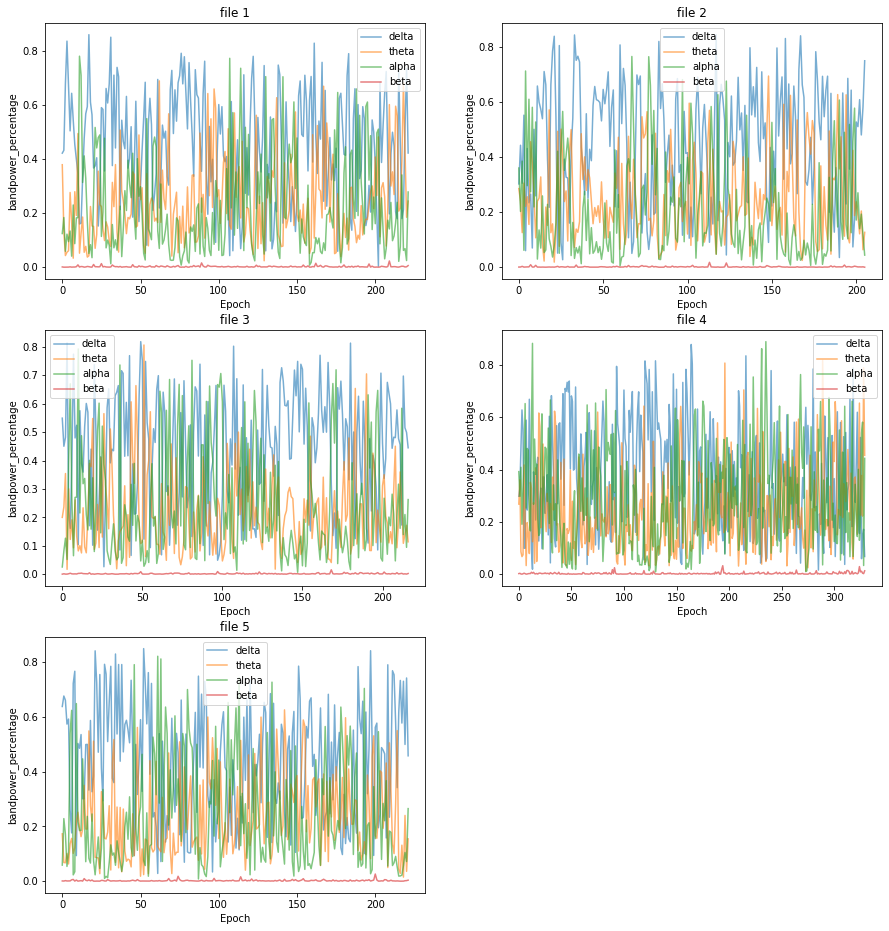

In [40]:
import matplotlib.pyplot as plt
bands = ['delta','theta','alpha','beta']

fig = plt.figure(figsize=(15,16))
nrows = len(raghav_ec_bandpower_percentage)//2 + 1 # // is the same as divide and do math.floor
ncols = 2

for i, b in enumerate(raghav_ec_bandpower_percentage):
    ax = fig.add_subplot(nrows,ncols,i+1)
    for j, band_ in enumerate(bands):
        ax.plot(b[10:340,:,j].reshape(-1), alpha=0.6, label=bands[j])
        ax.set_title(f"file {i+1}")
        ax.set_xlabel('Epoch')
        ax.set_ylabel('bandpower_percentage')
        ax.legend()


# Plot bandpower percentage for Work Data

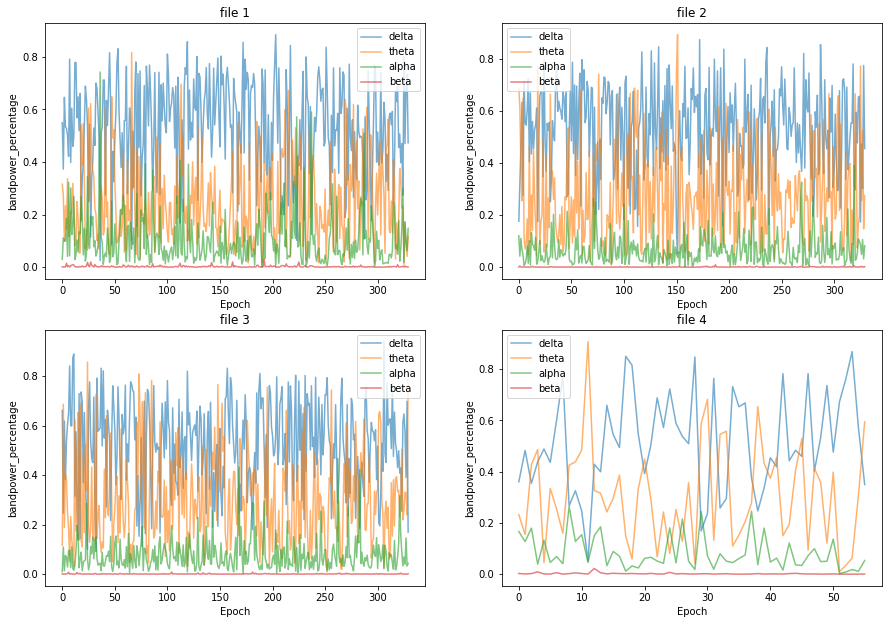

In [41]:
fig = plt.figure(figsize=(15,16))
nrows = len(raghav_w_bandpower_percentage)//2 + 1 # // is the same as divide and do math.floor
ncols = 2

for i, b in enumerate(raghav_w_bandpower_percentage):
    ax = fig.add_subplot(nrows,ncols,i+1)
    for j, band_ in enumerate(bands):
        ax.plot(b[10:340,:,j].reshape(-1), alpha=0.6, label=bands[j])
        ax.set_title(f"file {i+1}")
        ax.set_xlabel('Epoch')
        ax.set_ylabel('bandpower_percentage')
        ax.legend()

# Plot the histograms of all Eyes closed first

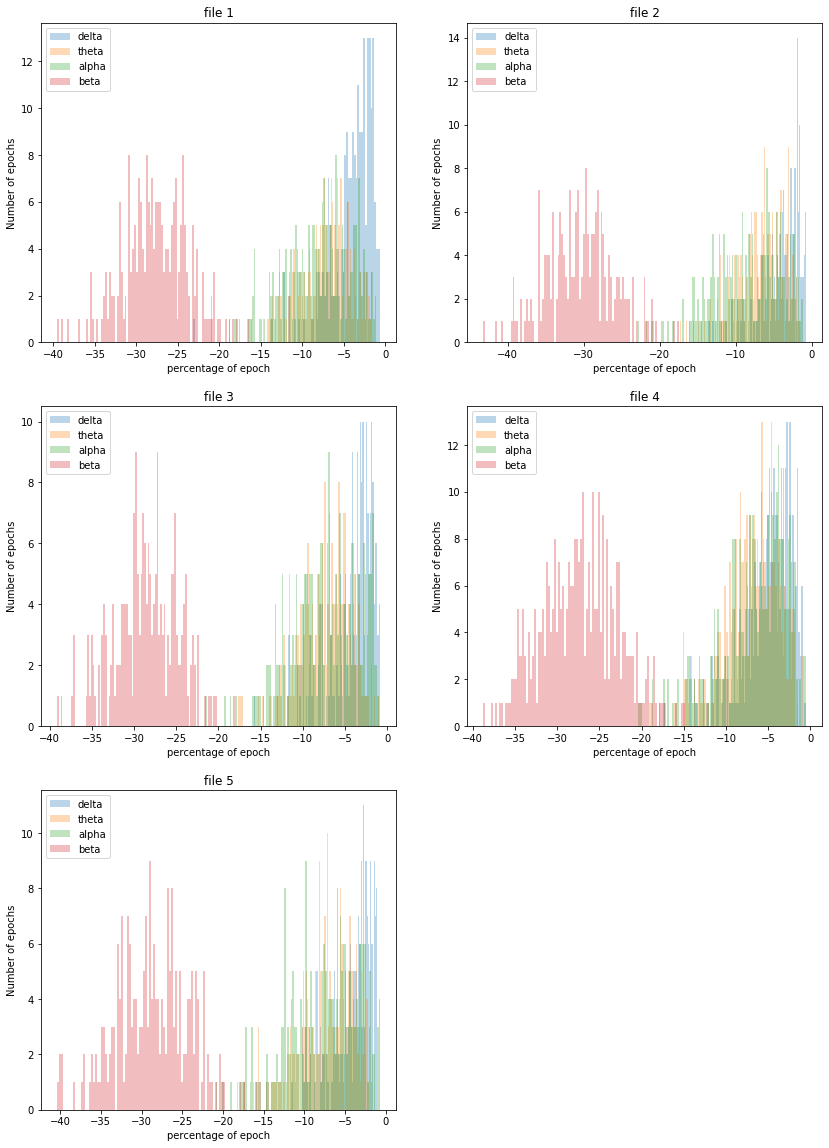

In [44]:
fig = plt.figure(figsize=(14,20))
nrows = len(raghav_ec_bandpower_percentage)//2 + 1 # // is the same as divide and do math.floor
ncols = 2

for i, b in enumerate(raghav_ec_bandpower_percentage):
    ax = fig.add_subplot(nrows,ncols,i+1)
    for j, band_ in enumerate(bands):
        ax.hist(10*np.log10(b[10:340,:,j].reshape(-1)),bins=100,
                       density=False, alpha=0.3, label=bands[j])
        ax.set_title(f"file {i+1}")
        ax.set_xlabel('percentage of epoch')
        ax.set_ylabel('Number of epochs')
        ax.legend()

# Plot histograms of work data

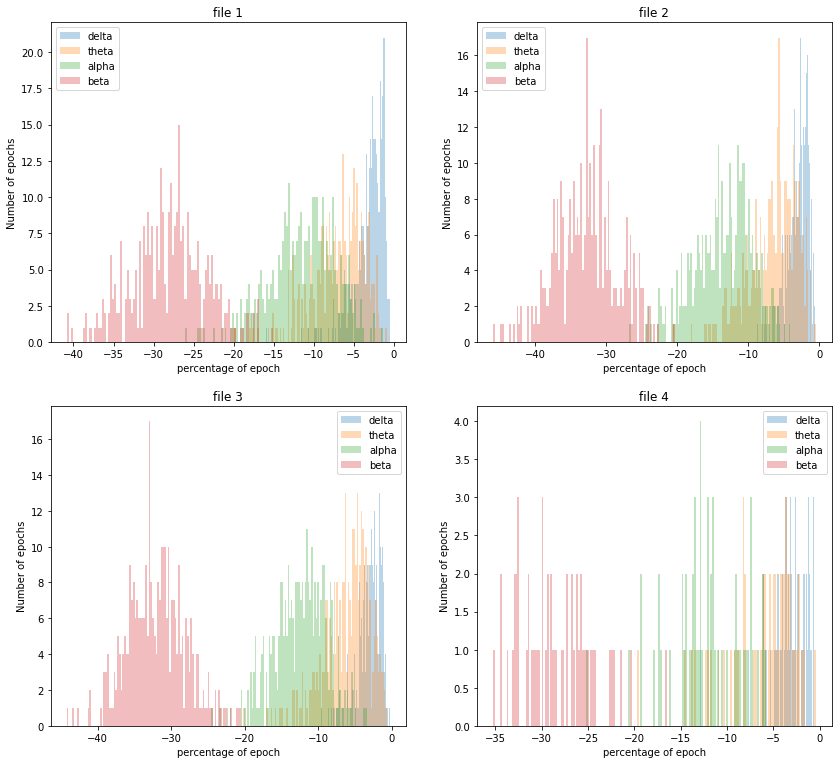

In [45]:
fig = plt.figure(figsize=(14,20))
nrows = len(raghav_w_bandpower_percentage)//2 + 1 # // is the same as divide and do math.floor
ncols = 2

for i, b in enumerate(raghav_w_bandpower_percentage):
    ax = fig.add_subplot(nrows,ncols,i+1)
    for j, band_ in enumerate(bands):
        ax.hist(10*np.log10(b[10:340,:,j].reshape(-1)),bins=100,
                       density=False, alpha=0.3, label=bands[j])
        ax.set_title(f"file {i+1}")
        ax.set_xlabel('percentage of epoch')
        ax.set_ylabel('Number of epochs')
        ax.legend()